In [28]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize as opt


A=0
$$ \frac{I_t}{I_i}=\frac{1}{1+\frac{4R}{(1-R)^2}sin^2(\frac{4\pi d}{2 \lambda}) $$

In [29]:
def model(d,R,s):
    lam=632e-9
    F= 4*R/((1-R)**2)
    x= (2*s*np.pi*d)/(2.929825153328242)
    return (1/(1+F*np.sin(x)**2))


In [30]:
s2f1=np.loadtxt(open("FP_set2_trail1.csv", "rb"), delimiter=",")
s2f1[1]= savgol_filter(s2f1[1], 25, 3) * 1000
#s3f1[1]=s3f1[1]*1000

sigma_y = s2f1[1] * 0.01
fits3f1=opt.curve_fit(f=model, xdata=s2f1[0][300::], ydata=s2f1[1][300::], sigma=sigma_y[300::], absolute_sigma= True,
                     p0=[2.15,2.5], bounds=(-np.inf, np.inf))
splines2f1= inter.InterpolatedUnivariateSpline(s2f1[0], s2f1[1])

s2f2=np.loadtxt(open("FP_set2_trail2.csv", "rb"), delimiter=",", )
s2f2[1]= savgol_filter(s2f2[1], 25, 3) * 1000
splines2f2= inter.InterpolatedUnivariateSpline(s2f2[0], s2f2[1])
#s3f2[1]=s3f2[1]*1000



s2f3=np.loadtxt(open("FP_set2_trail3.csv", "rb"), delimiter=",")
s2f3[1]= savgol_filter(s2f3[1], 25, 3) * 1000
splines2f3= inter.InterpolatedUnivariateSpline(s2f3[0], s2f3[1])
#s3f3[1]=s3f3[1]*1000




In [31]:
fits3f1

(array([8.31630991e+03, 5.46827468e+00]),
 array([[3.05025337e+08, 2.84020771e+00],
        [2.84020771e+00, 4.36460819e-03]]))

Text(0.5, 1.0, 'Mirror Set 2 Trail 1: Lock In vs Piezo Voltage ')

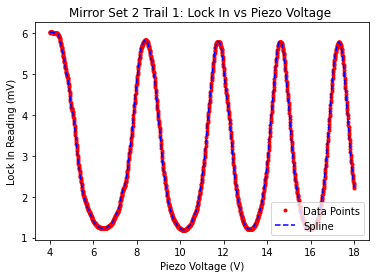

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f1[0], s2f1[1], 'r.', label="Data Points")

ax.plot(s2f1[0], splines2f1(s2f1[0]), 'b--', label="Spline")

ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Mirror Set 2 Trail 1: Lock In vs Piezo Voltage ")


Text(0.5, 1.0, 'Mirror Set 2 Trail 2: Lock In vs Piezo Voltage')

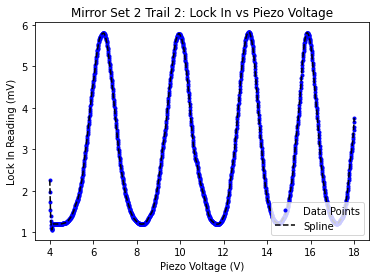

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f2[0], s2f2[1], 'b.', label="Data Points")
ax.plot(s2f2[0], splines2f2(s2f2[0]), 'k--', label="Spline")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Mirror Set 2 Trail 2: Lock In vs Piezo Voltage")


Text(0.5, 1.0, 'Mirror Set 2 Trail 3: Lock In vs Piezo Voltage')

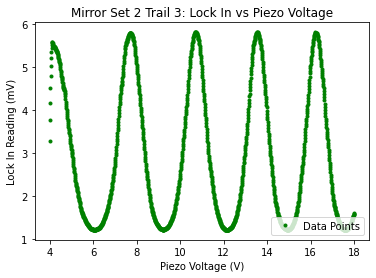

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f3[0], s2f3[1], 'g.', label="Data Points")
#ax.plot(s3f3[0],model(s3f3[0], fits3f3[0][0]),'k--', label="Model")


ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Mirror Set 2 Trail 3: Lock In vs Piezo Voltage")

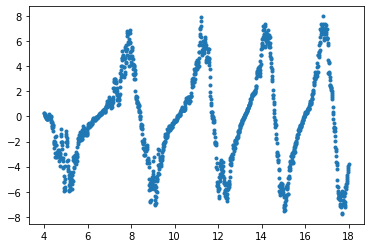

In [35]:
# Calculate x for max
firstdevs1f1=splines2f1.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(s1f1[0],10*splines1f1(s1f1[0]),'k--', label="Spline")
ax.plot(s2f1[0],firstdevs1f1(s2f1[0]), '.', label="Data Points")

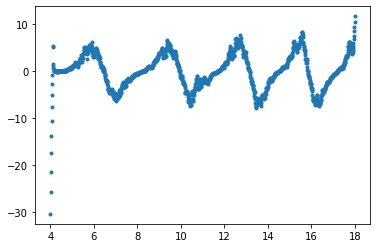

In [36]:
# Calculate x for max
firstdevs1f2=splines2f2.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(s1f2[0],10*splines1f2(s1f2[0]),'k--', label="Spline")
ax.plot(s2f2[0],firstdevs1f2(s2f2[0]), '.', label="Data Points")

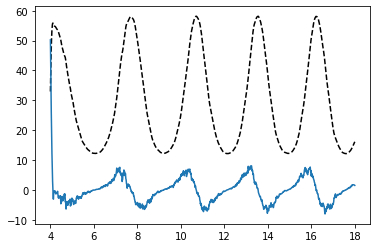

In [37]:
# Calculate x for max
firstdevs1f3=splines2f3.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f3[0],10*splines2f3(s2f3[0]),'k--', label="Spline")
ax.plot(s2f3[0],firstdevs1f3(s2f3[0]), '', label="Data Points")

In [38]:
firstpeakt1=opt.brentq(firstdevs1f1, 8, 9)
secondpeakt1=opt.brentq(firstdevs1f1,11, 12)
thirdpeakt1= opt.brentq(firstdevs1f1, 14 , 15)
fourthpeakt1= opt.brentq(firstdevs1f1, 17, 18)

print(f"Peaks for the first trail are: {firstpeakt1};{secondpeakt1};{thirdpeakt1};{fourthpeakt1}")

Peaks for the first trail are: 8.40071889919018;11.730070454631123;14.58820601834117;17.29492936804


In [39]:
secondpeakt1-firstpeakt1, thirdpeakt1-secondpeakt1,fourthpeakt1-thirdpeakt1

(3.329351555440944, 2.8581355637100465, 2.7067233496988283)

In [40]:

firstpeakt2=opt.brentq(firstdevs1f2, 9, 10)
secondpeakt2=opt.brentq(firstdevs1f2,12, 14)
thirdpeakt2= opt.brentq(firstdevs1f2, 15 , 16)


print(f"Peaks for the second trail are: {firstpeakt2};{secondpeakt2};{thirdpeakt2};")


firstpeakt3=opt.brentq(firstdevs1f3, 7, 8)
secondpeakt3=opt.brentq(firstdevs1f3,10, 11)
thirdpeakt3= opt.brentq(firstdevs1f3, 13 , 14)
fourthpeakt3= opt.brentq(firstdevs1f3, 16, 17)
print(f"Peaks for the second trail are: {firstpeakt3};{secondpeakt3};{thirdpeakt3};{fourthpeakt3}")

Peaks for the second trail are: 9.950108692272952;13.159358969660506;15.843864289795631;
Peaks for the second trail are: 7.7029562354552255;10.70642556697287;13.551932557393357;16.220962806242206


In [41]:
np.mean([secondpeakt1-firstpeakt1, thirdpeakt1-secondpeakt1,fourthpeakt1-thirdpeakt1,secondpeakt2-firstpeakt2,thirdpeakt2-secondpeakt2,secondpeakt3-firstpeakt3,thirdpeakt3-secondpeakt3,fourthpeakt3-thirdpeakt3])

2.9132465796449347

In [42]:
firstwhmt1= opt.brentq(lambda x: splines2f1(x) - splines2f1(firstpeakt1) / 2, 8.4, 9.4) - opt.brentq(lambda x: splines2f1(x) - splines2f1(firstpeakt1) / 2, 7, 7.9)
secondwhmt1= opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 12, 13) - opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 10.3, 11.6)
thirdwhmt1= opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 17, 18) - opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 16, 17)

firstwhmt2= opt.brentq(lambda x: splines2f2(x) - splines2f2(firstpeakt2) / 2, 10, 10.8) - opt.brentq(lambda x: splines2f2(x) - splines2f2(firstpeakt2) / 2, 9, 10)
secondwhmt2= opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 13, 14) - opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 12, 13)
thirdwhmt2= opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 16, 17) - opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 15, 16)

firstwhmt3= opt.brentq(lambda x: splines2f3(x) - splines2f3(firstpeakt3) / 2, 7.7, 9.4) - opt.brentq(lambda x: splines2f3(x) - splines2f3(firstpeakt3) / 2, 6, 7.7)
secondwhmt3= opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 10.7, 12) - opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 10, 10.7)
thirdwhmt3= opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 13.5, 14.5) - opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 12, 13.4)

In [43]:
print(firstwhmt1, secondwhmt1, thirdwhmt1)
print(firstwhmt2, secondwhmt2, thirdwhmt2)
print(firstwhmt3, secondwhmt3, thirdwhmt3)

1.546406900447817 1.323904145621439 1.1469982622884984
1.5082355714368987 1.2758871601043502 1.1756075561332473
1.3616085207354018 1.2413293955334321 1.2113170377377447


In [44]:
finess=np.array([(secondpeakt1 - firstpeakt1) / firstwhmt1, (thirdpeakt1 - secondpeakt1) / secondwhmt1, (fourthpeakt1 - thirdpeakt1) / thirdwhmt1,(secondpeakt2 - firstpeakt2) / firstwhmt2, (thirdpeakt2 - secondpeakt2) / secondwhmt2,
                 (secondpeakt3 - firstpeakt3) / firstwhmt3, (thirdpeakt3 - secondpeakt3) / secondwhmt3,(fourthpeakt3 - thirdpeakt3) / thirdwhmt3
])
finess, np.mean(finess), np.std(finess)

(array([2.15295958, 2.15886896, 2.35983213, 2.12781766, 2.10403036,
        2.20582442, 2.29230614, 2.2034118 ]),
 2.2006313799583843,
 0.08095842540574069)

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [45]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [46]:
R=r(finess)

In [47]:
np.mean(R),np.std(R)

(0.2649388101417773, 0.011245505945659906)

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


In [48]:
R

array([0.25833652, 0.25917183, 0.28691201, 0.2547705 , 0.25137875,
       0.26577015, 0.2777379 , 0.26543283])

$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [49]:
np.mean(R)

0.2649388101417773

In [50]:
np.std(R)

0.011245505945659906